In [80]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                              1.08388                     7.60278   
ethereum                             0.22392                    10.38134   
tether                              -0.21173                     0.04935   
ripple                              -0.37819                    -0.60926   
bitcoin-cash                         2.90585                    17.09717   
binancecoin                          2.10423                    12.85511   
chainlink                           -0.23935                    20.69459   
cardano                              0.00322                    13.99302   
litecoin                            -0.06341                     6.60221   
bitcoin-cash-sv                      0.92530                     3.29641   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                     
bitcoin                              6.57509                      7.67258   
ethereum                             4.80849                      0.13169   
tether                               0.00640                     -0.04237   
ripple                               2.24984                      0.23455   
bitcoin-cash                        14.75334                     15.74903   
binancecoin                          6.80688                      0.05865   
chainlink                            9.30098                    -11.21747   
cardano                              5.55476                     10.10553   
litecoin                             7.28931                      1.21662   
bitcoin-cash-sv                     -1.86656                      2.88926   

                 price_change_percentage_60d  price_change_percentage_200d  \
coin_id                                                                      
bitcoin                             -3.25185                      83.51840   
ethereum                           -12.88890                     186.77418   
tether                               0.28037                      -0.00542   
ripple                             -17.55245                      39.53888   
bitcoin-cash                       -13.71793                      21.66042   
binancecoin                         36.33486                     155.61937   
chainlink                          -43.69522                     403.22917   
cardano                            -22.84776                     264.51418   
litecoin                           -17.23960                      27.49919   
bitcoin-cash-sv                    -24.87434                       7.42562   

                 price_change_percentage_1y  
coin_id                                      
bitcoin                            37.51761  
ethereum                          101.96023  
tether                              0.01954  
ripple                            -16.60193  
bitcoin-cash                       14.49384  
binancecoin                        69.69195  
chainlink                         325.13186  
cardano                           156.09756  
litecoin                          -12.66408  
bitcoin-cash-sv                    93.73082

In [3]:
# Generate summary statistics
df_market_data.describe()

price_change_percentage_24h  price_change_percentage_7d  \
count                    41.000000                   41.000000   
mean                     -0.269686                    4.497147   
std                       2.694793                    6.375218   
min                     -13.527860                   -6.094560   
25%                      -0.608970                    0.047260   
50%                      -0.063410                    3.296410   
75%                       0.612090                    7.602780   
max                       4.840330                   20.694590   

       price_change_percentage_14d  price_change_percentage_30d  \
count                    41.000000                    41.000000   
mean                      0.185787                     1.545693   
std                       8.376939                    26.344218   
min                     -18.158900                   -34.705480   
25%                      -5.026620                   -10.438470   
50%                       0.109740                    -0.042370   
75%                       5.510740                     4.578130   
max                      24.239190                   140.795700   

       price_change_percentage_60d  price_change_percentage_200d  \
count                    41.000000                     41.000000   
mean                     -0.094119                    236.537432   
std                      47.365803                    435.225304   
min                     -44.822480                     -0.392100   
25%                     -25.907990                     21.660420   
50%                      -7.544550                     83.905200   
75%                       0.657260                    216.177610   
max                     223.064370                   2227.927820   

       price_change_percentage_1y  
count                   41.000000  
mean                   347.667956  
std                   1247.842884  
min                    -17.567530  
25%                      0.406170  
50%                     69.691950  
75%                    168.372510  
max                   7852.089700

In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [15]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
df_market_data_scaled = StandardScaler().fit_transform(df_market_data[['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y']])
df_market_data_scaled[0:3]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051]])

In [20]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(df_market_data_scaled, 
                             columns=['price_change_percentage_24h', 'price_change_percentage_7d',
                                       'price_change_percentage_14d', 'price_change_percentage_30d',
                                       'price_change_percentage_60d', 'price_change_percentage_200d',
                                       'price_change_percentage_1y'])

# Copy the crypto names from the original data
df_market_data_scaled['Coins'] = df_market_data.index
# Set the coinid column as index
df_market_data_scaled.set_index(['Coins'], inplace=True)

# Display sample data
df_market_data_scaled.head(10)

price_change_percentage_24h  price_change_percentage_7d  \
Coins                                                                      
bitcoin                             0.508529                    0.493193   
ethereum                            0.185446                    0.934445   
tether                              0.021774                   -0.706337   
ripple                             -0.040764                   -0.810928   
bitcoin-cash                        1.193036                    2.000959   
binancecoin                         0.891871                    1.327295   
chainlink                           0.011397                    2.572251   
cardano                             0.102530                    1.508001   
litecoin                            0.077497                    0.334297   
bitcoin-cash-sv                     0.448952                   -0.190684   

                 price_change_percentage_14d  price_change_percentage_30d  \
Coins                                                                       
bitcoin                             0.772200                     0.235460   
ethereum                            0.558692                    -0.054341   
tether                             -0.021680                    -0.061030   
ripple                              0.249458                    -0.050388   
bitcoin-cash                        1.760610                     0.545842   
binancecoin                         0.800214                    -0.057148   
chainlink                           1.101647                    -0.490495   
cardano                             0.648885                     0.328959   
litecoin                            0.858520                    -0.012646   
bitcoin-cash-sv                    -0.248043                     0.051634   

                 price_change_percentage_60d  price_change_percentage_200d  \
Coins                                                                        
bitcoin                            -0.067495                     -0.355953   
ethereum                           -0.273483                     -0.115759   
tether                              0.008005                     -0.550247   
ripple                             -0.373164                     -0.458259   
bitcoin-cash                       -0.291203                     -0.499848   
binancecoin                         0.778653                     -0.188232   
chainlink                          -0.931954                      0.387759   
cardano                            -0.486349                      0.065080   
litecoin                           -0.366477                     -0.486266   
bitcoin-cash-sv                    -0.529666                     -0.532961   

                 price_change_percentage_1y  
Coins                                        
bitcoin                           -0.251637  
ethereum                          -0.199352  
tether                            -0.282061  
ripple                            -0.295546  
bitcoin-cash                      -0.270317  
binancecoin                       -0.225533  
chainlink                         -0.018284  
cardano                           -0.155428  
litecoin                          -0.292351  
bitcoin-cash-sv                   -0.206029

---

### Find the Best Value for k Using the Original Data.

In [21]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [22]:
# Create an empty list to store the inertia values
inertia=[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_market_data_scaled)
    inertia.append(k_model.inertia_)


/Users/joshuagibson/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/joshuagibson/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/joshuagibson/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/joshuagibson/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412:

In [25]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)
elbow_df

k     inertia
0   1  287.000000
1   2  198.571818
2   3  123.190482
3   4   79.022435
4   5   65.302379
5   6   52.101806
6   7   46.035250
7   8   37.284807
8   9   32.161417
9  10   28.075253

In [24]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4 seems like the best value for 'k', as the difference between 3 and 4 seems too big while the line after 4 levels out more at a low inertia point.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [26]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [27]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)

/Users/joshuagibson/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [28]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_4 = model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
k_4

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [29]:
# Create a copy of the DataFrame
df_market_data_predictions = df_market_data_scaled.copy()

In [30]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_predictions["Predictions"] = k_4

# Display sample data
df_market_data_predictions.head(10)

price_change_percentage_24h  price_change_percentage_7d  \
Coins                                                                      
bitcoin                             0.508529                    0.493193   
ethereum                            0.185446                    0.934445   
tether                              0.021774                   -0.706337   
ripple                             -0.040764                   -0.810928   
bitcoin-cash                        1.193036                    2.000959   
binancecoin                         0.891871                    1.327295   
chainlink                           0.011397                    2.572251   
cardano                             0.102530                    1.508001   
litecoin                            0.077497                    0.334297   
bitcoin-cash-sv                     0.448952                   -0.190684   

                 price_change_percentage_14d  price_change_percentage_30d  \
Coins                                                                       
bitcoin                             0.772200                     0.235460   
ethereum                            0.558692                    -0.054341   
tether                             -0.021680                    -0.061030   
ripple                              0.249458                    -0.050388   
bitcoin-cash                        1.760610                     0.545842   
binancecoin                         0.800214                    -0.057148   
chainlink                           1.101647                    -0.490495   
cardano                             0.648885                     0.328959   
litecoin                            0.858520                    -0.012646   
bitcoin-cash-sv                    -0.248043                     0.051634   

                 price_change_percentage_60d  price_change_percentage_200d  \
Coins                                                                        
bitcoin                            -0.067495                     -0.355953   
ethereum                           -0.273483                     -0.115759   
tether                              0.008005                     -0.550247   
ripple                             -0.373164                     -0.458259   
bitcoin-cash                       -0.291203                     -0.499848   
binancecoin                         0.778653                     -0.188232   
chainlink                          -0.931954                      0.387759   
cardano                            -0.486349                      0.065080   
litecoin                           -0.366477                     -0.486266   
bitcoin-cash-sv                    -0.529666                     -0.532961   

                 price_change_percentage_1y  Predictions  
Coins                                                     
bitcoin                           -0.251637            2  
ethereum                          -0.199352            2  
tether                            -0.282061            0  
ripple                            -0.295546            0  
bitcoin-cash                      -0.270317            2  
binancecoin                       -0.225533            2  
chainlink                         -0.018284            2  
cardano                           -0.155428            2  
litecoin                          -0.292351            2  
bitcoin-cash-sv                   -0.206029            0

In [85]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_market_data_predictions.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Predictions",
    hover_cols=['Coins'],
    xlabel='PC1',
    ylabel='PC2'
    
)

:NdOverlay   [Predictions]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Coins)

---

### Optimize Clusters with Principal Component Analysis.

In [32]:
# Create a PCA model instance and set `n_components=3`.
pca=PCA(n_components=3)

In [35]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
df_market_data_pca = pca.fit_transform(df_market_data_scaled)
# View the first five rows of the DataFrame. 
df_market_data_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [36]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [38]:
import numpy as np

# Assuming eigenvalues are stored in an array or list
eigenvalues = np.array([0.3719856, 0.34700813, 0.17603793])

# Calculate total explained variance
total_explained_variance = np.sum(eigenvalues)

total_explained_variance

0.89503166

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total Explained Variance: 0.89503166

In [61]:
# Create a new DataFrame with the PCA data.
df_market_data_pca = pd.DataFrame(df_market_data_pca, 
                             columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original data
df_market_data_pca['Coins'] = df_market_data.index

# Set the coinid column as index
df_market_data_pca.set_index(['Coins'], inplace=True)

# Display sample data
df_market_data_pca.head()

PC1       PC2       PC3
Coins                                     
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715

---

### Find the Best Value for k Using the PCA Data

In [55]:
# Create a list with the number of k-values from 1 to 11
k_pca = list(range(1, 11))

In [58]:
# Create an empty list to store the inertia values
inertia_pca=[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k_pca:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_market_data_pca)
    inertia_pca.append(k_model.inertia_)

/Users/joshuagibson/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/joshuagibson/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/joshuagibson/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/joshuagibson/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412:

In [59]:
elbow_data2 = {"k": k_pca, "inertia": inertia_pca}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df2 = pd.DataFrame(elbow_data2)
elbow_df2

k     inertia
0   1  256.874086
1   2  168.811896
2   3   93.774626
3   4   49.665497
4   5   37.839466
5   6   27.720626
6   7   21.182776
7   8   17.016962
8   9   13.668325
9  10   10.484890

In [60]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df2.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for 'k' is 4 when using PCA data.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, it does not differ. 4 is the best value for both.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [62]:
# Initialize the K-Means model using the best value for k
pca_model = KMeans(n_clusters=4, random_state=0)

In [63]:
# Fit the K-Means model using the PCA data
model.fit(df_market_data_pca)

/Users/joshuagibson/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [64]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_pca = model.predict(df_market_data_pca)
# Print the resulting array of cluster values.
k_pca

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [84]:
# Create a copy of the DataFrame with the PCA data
df_market_data_pca_predictions = df_market_data_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_market_data_pca_predictions["Predictions"] = k_pca

# Display sample data
df_market_data_pca_predictions.head()

PC1       PC2       PC3  Predictions
Coins                                                  
bitcoin      -0.600667  0.842760  0.461595            2
ethereum     -0.458261  0.458466  0.952877            2
tether       -0.433070 -0.168126 -0.641752            0
ripple       -0.471835 -0.222660 -0.479053            0
bitcoin-cash -1.157800  2.041209  1.859715            2

In [67]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_market_data_pca_predictions.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="Predictions",
    hover_cols=['Coins']
)

:NdOverlay   [Predictions]
   :Scatter   [PC1]   (PC2,Coins)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

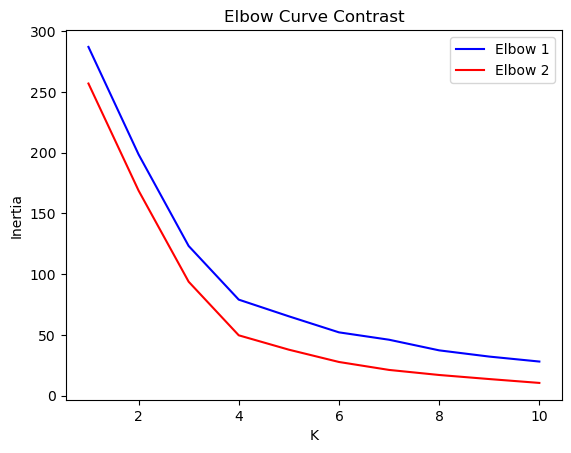

In [83]:
# Composite plot to contrast the Elbow curves
x = elbow_df['k']
y1 = elbow_df['inertia']
y2 = elbow_df2['inertia']
plt.plot(x, y1, label='Elbow 1', color='blue')
plt.plot(x, y2, label='Elbow 2', color='red')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Elbow Curve Contrast')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [88]:
# Composite plot to contrast the clusters
scatter_plot1 = df_market_data_predictions.hvplot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", 
                                          by="Predictions", hover_cols=['Coins'], xlabel='PC1', ylabel='PC2') 

scatter_plot2 = df_market_data_pca_predictions.hvplot.scatter(x="PC1", y="PC2", by="Predictions", hover_cols=['Coins'])

composite_plot = scatter_plot1 + scatter_plot2
composite_plot

:Layout
   .NdOverlay.I  :NdOverlay   [Predictions]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Coins)
   .NdOverlay.II :NdOverlay   [Predictions]
      :Scatter   [PC1]   (PC2,Coins)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 